<a href="https://colab.research.google.com/github/sreeja2208/assignments/blob/main/Lab7Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#lecture 7 project

# **Support Vector Machines Classifier** 

Hello friends,

Support Vector Machines (SVMs in short) are supervised machine learning algorithms that are used for classification and regression purposes. In this kernel, we are going to build a Support Vector Machines classifier to classify a Pulsar star. The dataset used for this project is **Predicting a Pulsar Star**. 

So, let's get started.

#  Dataset description<a class="anchor" id="5"></a>



I have used the **Predicting a Pulsar Star** dataset for this project.

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Classification algorithms in particular are being adopted, which treat the data sets as binary classification problems. Here the legitimate pulsar examples form  minority positive class and spurious examples form the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).


### Attribute Information:


Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile. The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.

2. Standard deviation of the integrated profile.

3. Excess kurtosis of the integrated profile.

4. Skewness of the integrated profile.

5. Mean of the DM-SNR curve.

6. Standard deviation of the DM-SNR curve.

7. Excess kurtosis of the DM-SNR curve.

8. Skewness of the DM-SNR curve.

9. Class

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/pulsar_stars.csv')

In [4]:
df.shape

(17898, 9)

In [5]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


We can see that there are 9 variables in the dataset. 8 are continuous variables and 1 is discrete variable. The discrete variable is `target_class` variable. It is also the target variable.


Now, I will view the column names to check for leading and trailing spaces.

In [6]:
col_names=df.columns
col_names

Index(['  Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'Target_class'],
      dtype='object')

We can see that there are leading spaces (spaces at the start of the string name) in the dataframe. So, I will remove these leading spaces.

In [7]:
df.columns=df.columns.str.strip()

In [8]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'Target_class'],
      dtype='object')

We can see that the leading spaces are removed from the column name. But the column names are very long. So, I will make them short by renaming them.

In [9]:
df.columns=['IP mean','IP sd','IP kurtosis','IP skewness','DM-SNR mean','DM-SNR sd','DM-SNR kurtosis','DM-SNR skewness','target_class']

In [10]:
df.columns

Index(['IP mean', 'IP sd', 'IP kurtosis', 'IP skewness', 'DM-SNR mean',
       'DM-SNR sd', 'DM-SNR kurtosis', 'DM-SNR skewness', 'target_class'],
      dtype='object')

We can see that the column names are shortened. IP stands for `integrated profile` and DM-SNR stands for `delta modulation and signal to noise ratio`. Now, it is much more easy to work with the columns.

Our target variable is the `target_class` column. So, I will check its distribution.

In [11]:
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [12]:
df['target_class'].value_counts()/np.float(len(df))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


0    0.908426
1    0.091574
Name: target_class, dtype: float64

We can see that percentage of observations of the class label `0` and `1` is 90.84% and 9.16%. So, this is a class imbalanced problem. I will deal with that in later section.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP mean          17898 non-null  float64
 1   IP sd            17898 non-null  float64
 2   IP kurtosis      17898 non-null  float64
 3   IP skewness      17898 non-null  float64
 4   DM-SNR mean      17898 non-null  float64
 5   DM-SNR sd        17898 non-null  float64
 6   DM-SNR kurtosis  17898 non-null  float64
 7   DM-SNR skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [14]:
df.isnull().sum()

IP mean            0
IP sd              0
IP kurtosis        0
IP skewness        0
DM-SNR mean        0
DM-SNR sd          0
DM-SNR kurtosis    0
DM-SNR skewness    0
target_class       0
dtype: int64

In [15]:
round(df.describe(),2)

,IP mean,IP sd,IP kurtosis,IP skewness,DM-SNR mean,DM-SNR sd,DM-SNR kurtosis,DM-SNR skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


In [16]:
df.describe()

,IP mean,IP sd,IP kurtosis,IP skewness,DM-SNR mean,DM-SNR sd,DM-SNR kurtosis,DM-SNR skewness,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


On closer inspection, we can suspect that all the continuous variables may contain outliers.


I will draw boxplots to visualise outliers in the above variables. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'DM-SNR skewness')

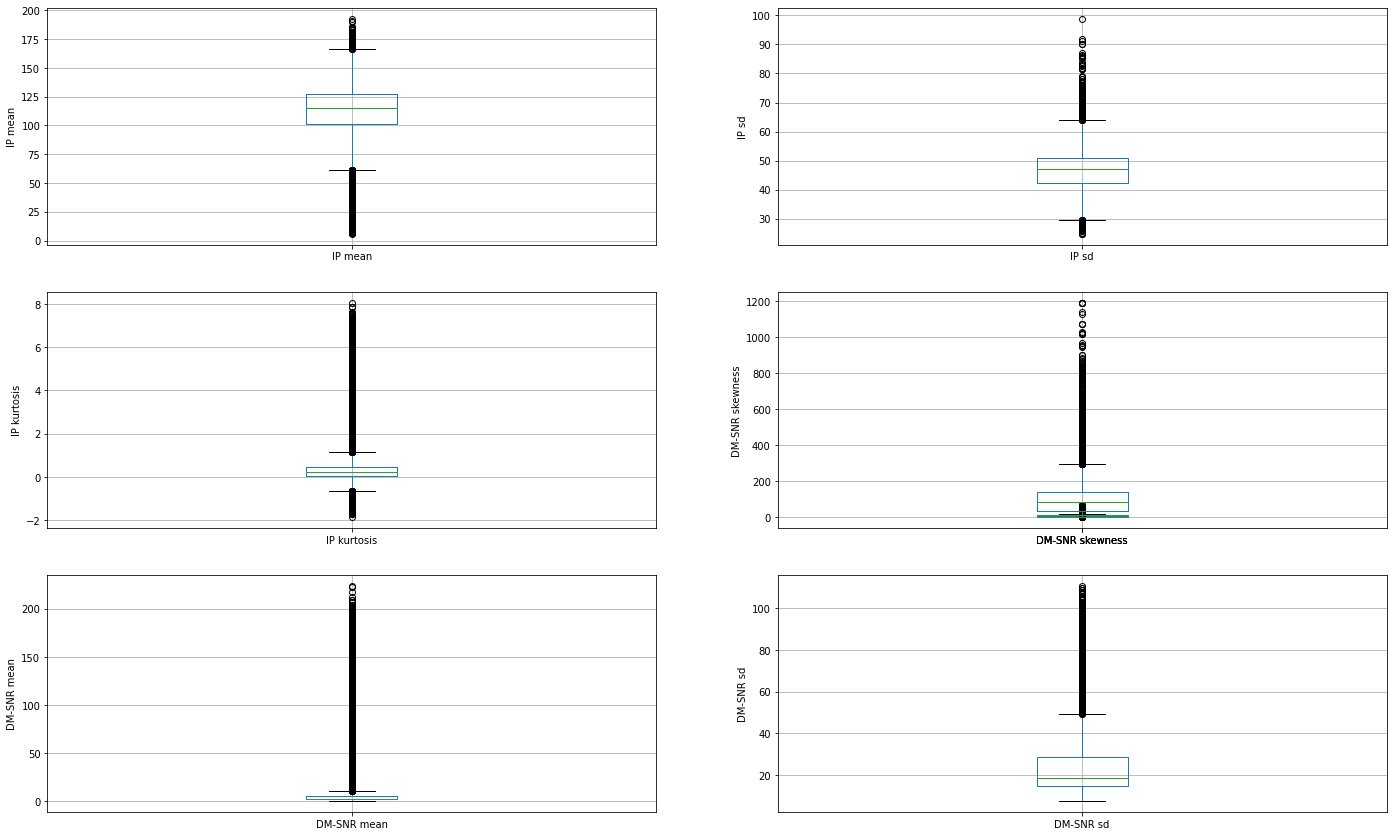

In [17]:
#draw boxplot to visualize to outliers
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig=df.boxplot(column='IP mean')
fig.set_title('')
fig.set_ylabel('IP mean')

plt.subplot(4,2,2)
fig=df.boxplot(column='IP sd')
fig.set_title('')
fig.set_ylabel('IP sd')

plt.subplot(4,2,3)
fig=df.boxplot(column='IP kurtosis')
fig.set_title('')
fig.set_ylabel('IP kurtosis')

plt.subplot(4,2,4)
fig=df.boxplot(column='IP skewness')
fig.set_title('')
fig.set_ylabel('IP skewness')

plt.subplot(4,2,5)
fig=df.boxplot(column='DM-SNR mean')
fig.set_title('')
fig.set_ylabel('DM-SNR mean')

plt.subplot(4,2,6)
fig=df.boxplot(column='DM-SNR sd')
fig.set_title('')
fig.set_ylabel('DM-SNR sd')

plt.subplot(4,2,4)
fig=df.boxplot(column='DM-SNR kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR kurtosis')

plt.subplot(4,2,4)
fig=df.boxplot(column='DM-SNR skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR skewness')

The above boxplots confirm that there are lot of outliers in these variables.

### Handle outliers with SVMs


There are 2 variants of SVMs. They are `hard-margin variant of SVM` and `soft-margin variant of SVM`.


The `hard-margin variant of SVM` does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.


Another version of SVM is called `soft-margin variant of SVM`. In this case, we can have a few points incorrectly classified or 
classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of `C` parameter, which controls the outliers. `Low C` implies we are allowing more outliers and `high C` implies less outliers.


The message is that since the dataset contains outliers, so the value of C should be high while training the model.

### Check the distribution of variables


Now, I will plot the histograms to check distributions to find out if they are normal or skewed. 

Text(0, 0.5, 'Number of pulsar stars')

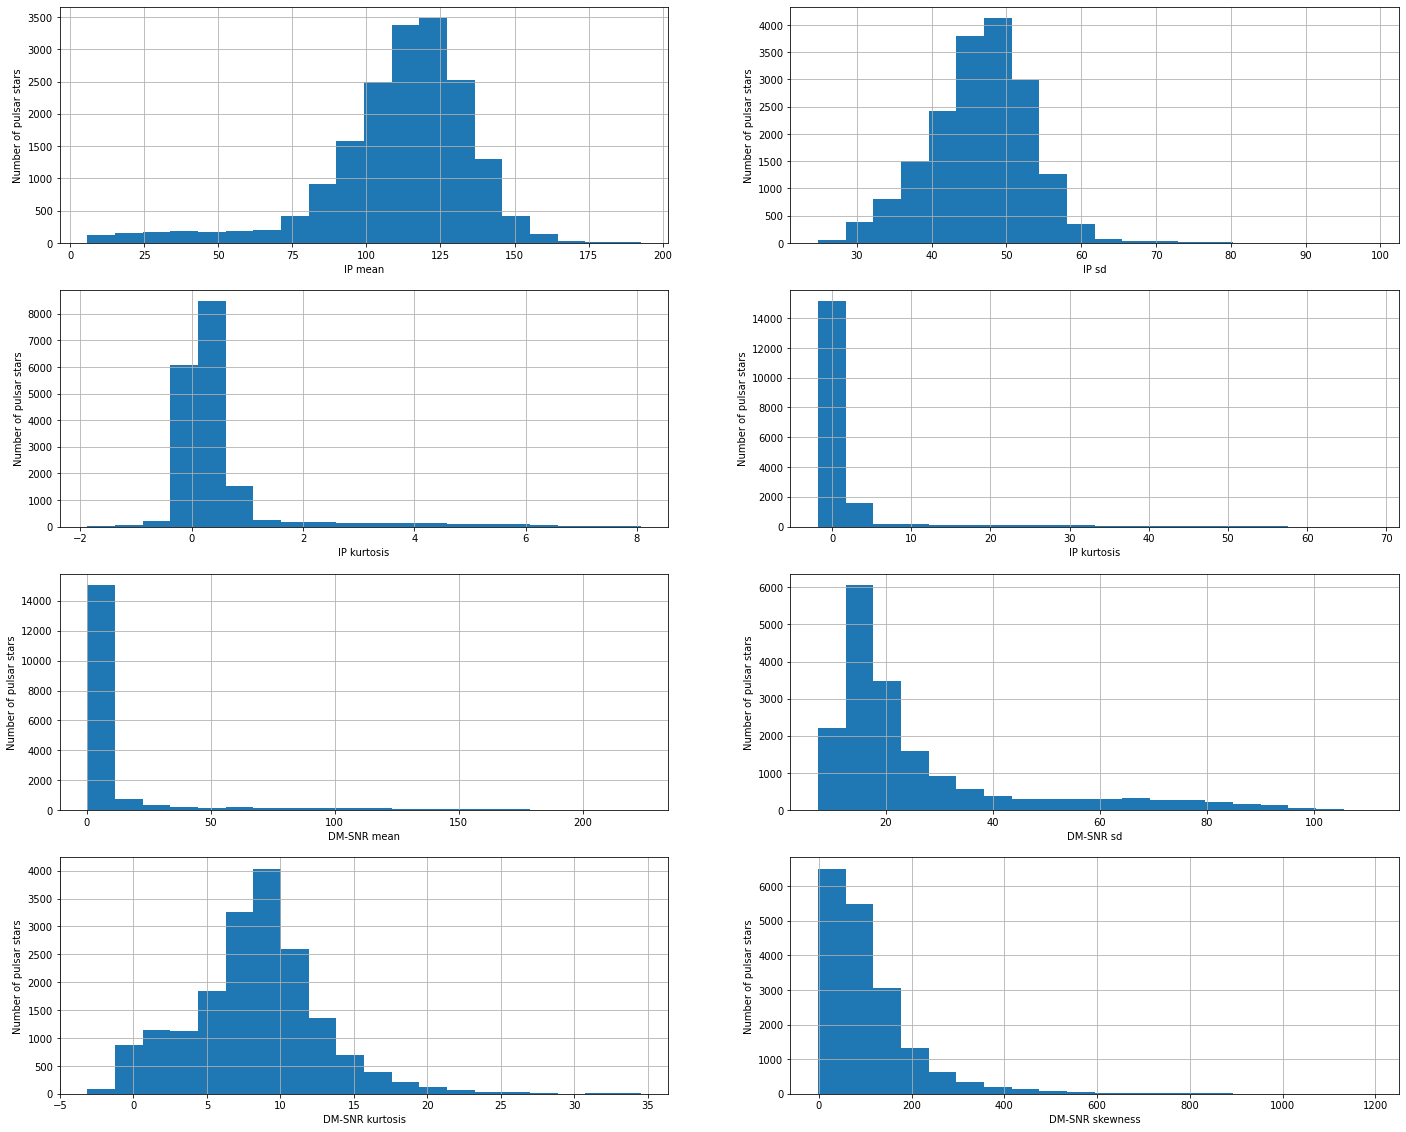

In [18]:
#plot histogram to check distribution

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df['IP mean'].hist(bins=20)
fig.set_xlabel('IP mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['IP sd'].hist(bins=20)
fig.set_xlabel('IP sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['IP kurtosis'].hist(bins=20)
fig.set_xlabel('IP kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['IP skewness'].hist(bins=20)
fig.set_xlabel('IP kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['DM-SNR mean'].hist(bins=20)
fig.set_xlabel('DM-SNR mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['DM-SNR sd'].hist(bins=20)
fig.set_xlabel('DM-SNR sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['DM-SNR kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['DM-SNR skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR skewness')
fig.set_ylabel('Number of pulsar stars')

We can see that all the 8 continuous variables are skewed. 

In [19]:
x=df.drop(['target_class'],axis=1)
y=df['target_class']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
x_train.shape,x_test.shape

((14318, 8), (3580, 8))

In [22]:
cols=x_train.columns

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
x_train=pd.DataFrame(x_train,columns=[cols])
x_test=pd.DataFrame(x_test,columns=[cols])
x_train.describe()

,IP mean,IP sd,IP kurtosis,IP skewness,DM-SNR mean,DM-SNR sd,DM-SNR kurtosis,DM-SNR skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.986604e-16,-6.735622e-16,1.792879e-17,3.631409e-17,-8.459267e-17,-1.563912e-16,-1.277090e-17,1.172992e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

# **Run SVM with default hyperparameters** <a class="anchor" id="12"></a>


Default hyperparameter means C=1.0,  kernel=`rbf` and gamma=`auto` among other parameters.

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Model accuracy with default high parameters is {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy with default high parameters is 0.9827


### Run SVM with rbf kernel and C=100.0


We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. 
So, I will run SVM with kernel=`rbf` and C=100.0.

In [26]:
svc=SVC(C=100)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Model accuracy score with rbf kernal and c=100 is {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with rbf kernal and c=100 is 0.9832


In [27]:
svc=SVC(C=1000)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Model accuracy score with rbf kernal and c=1000 is {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with rbf kernal and c=1000 is 0.9816


In [29]:
linear_svc=SVC(kernel='linear',C=1)
linear_svc.fit(x_train,y_train)
y_pred=linear_svc.predict(x_test)
print('Model accuracy score with linear kernel and c=1 is {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with linear kernal and c=1 is 0.9830


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [33]:
linear_svc100=SVC(kernel='linear',C=100)
linear_svc100.fit(x_train,y_train)
y_pred=linear_svc100.predict(x_test)
print('Model accuracy score with linear kernel and c=100 is {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with linear kernel and c=100 is 0.9832


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [34]:
linear_svc1000=SVC(kernel='linear',C=1000)
linear_svc1000.fit(x_train,y_train)
y_pred=linear_svc1000.predict(x_test)
print('Model accuracy score with linear kernel and c=1000 is {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with linear kernel and c=1000 is 0.9832


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


We can see that we can obtain higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [46]:
y_pred_train=linear_svc.predict(x_train)
print('Acuuracy of training set is {0:.4f}'.format(accuracy_score(y_train,y_pred_train)))
y_pred_test=linear_svc.predict(x_test)
print('Accuracy of testing set is {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Acuuracy of training set is 0.9783
Accuracy of testing set is 0.8855


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


### Compare model accuracy with null accuracy


So, the model accuracy is 0.9832. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [37]:
y_test.value_counts()

0    3306
1     274
Name: target_class, dtype: int64

In [39]:
null_accuracy=y_test.value_counts()[0]/len(y_test)
print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.9235


In [41]:
#svm with polynomial kernal
poly_svc=SVC(kernel='poly',C=1)
poly_svc.fit(x_train,y_train)
y_pred=poly_svc.predict(x_test)
print('Accuracy score with poly kernel with c=1 is {0:.4f}'.format(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Accuracy score with poly kernel with c=1 is 0.9807


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [43]:
poly_svc100=SVC(kernel='poly',C=100)
poly_svc100.fit(x_train,y_train)
y_pred=poly_svc100.predict(x_test)
print('Accuracy score with poly kernel with c=100 is {0:.4f}'.format(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Accuracy score with poly kernel with c=100 is 0.9824


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [44]:
#sigmoid kernel
sigmoid_svc=SVC(kernel='sigmoid',C=1)
sigmoid_svc.fit(x_train,y_train)
y_pred=sigmoid_svc.predict(x_test)
print('accuracy score with sigmoid kernel with c=1 is {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


accuracy score with sigmoid kernel with c=1 is 0.8858


In [45]:
sigmoid_svc100=SVC(kernel='sigmoid',C=100)
sigmoid_svc100.fit(x_train,y_train)
y_pred=sigmoid_svc100.predict(x_test)
print('accuracy score with sigmoid kernel with c=100 is {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


accuracy score with sigmoid kernel with c=100 is 0.8855


### Comments


We get maximum accuracy with `rbf` and `linear` kernel with C=100.0. and the accuracy is 0.9832. Based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, this is not true. Here, we have an imbalanced dataset. The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.


So, we must explore alternative metrices that provide better guidance in selecting models. In particular, we would like to know the underlying distribution of values and the type of errors our classifer is making. 


One such metric to analyze the model performance in imbalanced classes problem is `Confusion matrix`.

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
print('confusion matrix\n\n',cm)
print('\ntrue positives(TP)=',cm[0][0])
print('\ntrue negatives(TN)=',cm[1][1])
print('\nfalse positive(FP)=',cm[0][1])
print('\nfalse negative(FN)=',cm[1][0])

confusion matrix

 [[3289   17]
 [  44  230]]

true positives(TP)= 3289

true negatives(TN)= 230

false positive(FP)= 17

false negative(FN)= 44


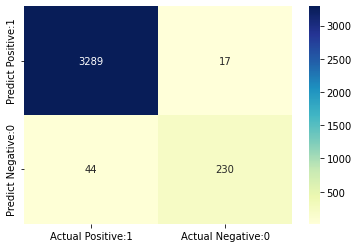

In [49]:
#visualizing confusion matrix with seaborn heatmap
cm_matrix=pd.DataFrame(data=cm,columns=['Actual Positive:1','Actual Negative:0'],index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm_matrix,annot=True,fmt='d',cmap='YlGnBu')

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [51]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [52]:
#classification accuracy
TP=cm[0][0]
TN=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

In [55]:
classification_accuracy=(TP+TN)/(TP+TN+FP+FN)
print('classification accuracy is {0:0.4f}'.format(classification_accuracy))

classification accuracy is 0.9830


In [57]:
#classification error
classification_error=(FP+FN)/(TP+TN+FP+FN)
print('classification accuracy is {0:0.4f}'.format(classification_error))

classification accuracy is 0.0170


In [58]:
#precision
precision=TP/(TP+FP)
print('precision is {0:0.4f}'.format(precision))

precision is 0.9949


In [59]:
#recall
recall=TP/(TP+FN)
print('recall is {0:0.4f}'.format(recall))

recall is 0.9868


In [60]:
#true positive rate
true_positive_rate=TP/(TP+FN)
print('true positive rate is {0:0.4f}'.format(true_positive_rate))

true positive rate is 0.9868


In [62]:
#false positive rate
false_positive_rate=FP/(FP+TN)
print('false positive rate is {0:0.4f}'.format(false_positive_rate))

false positive rate is 0.0688


In [63]:
specificity=TN/(TN+FP)
print('Specificity:{0:0.4f}'.format(specificity))

Specificity:0.9312


# **Results and conclusion** 



1. There are outliers in our dataset. So, as we increase the value of C to limit fewer outliers, the accuracy increased. This is true with different kinds of kernels.

2.	We get maximum accuracy with `rbf` and `linear` kernel with C=100.0 and the accuracy is 0.9832. So, we can conclude that our model is doing a very good job in terms of predicting the class labels. But, this is not true. Here, we have an imbalanced dataset. Accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem. So, we must explore `confusion matrix` that provide better guidance in selecting models. 